In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from CorrectFeatures import correct_SCT_data, correct_SCT_labels, correct_US_data, correct_US_labels


In [2]:
# def plot_learning_curve(
#     estimator,
#     title,
#     X,
#     y,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
# ):
#     axes.set_title(title)
#     if ylim is not None:
#         axes.set_ylim(*ylim)
#     axes.set_xlabel("Training examples")
#     axes.set_ylabel("Score")
#
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         estimator,
#         X,
#         y,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
#     print(train_scores)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     print(train_scores_mean)
#
#     # Plot learning curve
#     axes.grid()
#     axes.fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes.fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes.plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes.plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes.legend(loc="best")
#
#     return plt

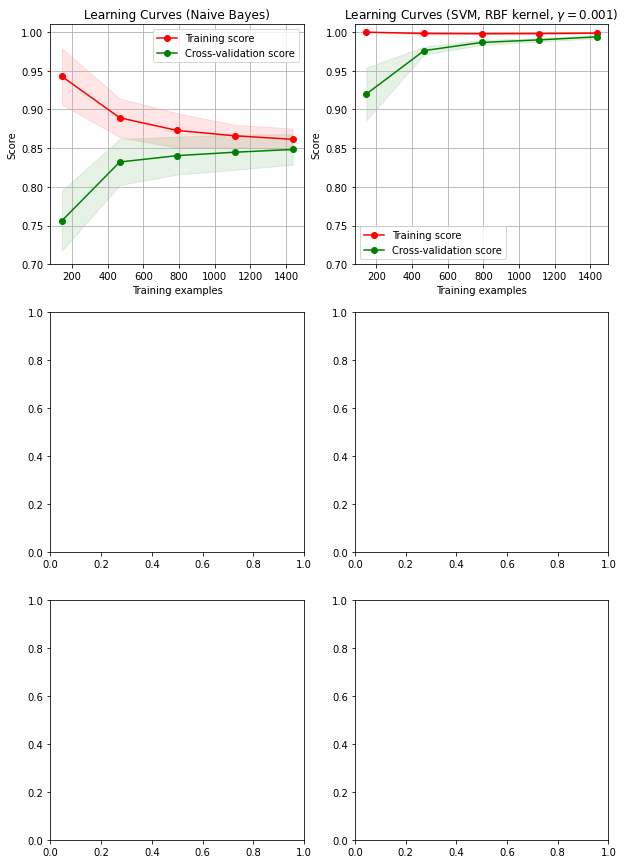

In [3]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    # print(y)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    # print(train_sizes)
    # print(train_scores)
    # print(test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")

    # Plot n_samples vs fit_times
    # axes[1].grid()
    # axes[1].plot(train_sizes, fit_times_mean, "o-")
    # axes[1].fill_between(
    #     train_sizes,
    #     fit_times_mean - fit_times_std,
    #     fit_times_mean + fit_times_std,
    #     alpha=0.1,
    # )
    # axes[1].set_xlabel("Training examples")
    # axes[1].set_ylabel("fit_times")
    # axes[1].set_title("Scalability of the model")
    #
    # # Plot fit_time vs score
    # fit_time_argsort = fit_times_mean.argsort()
    # fit_time_sorted = fit_times_mean[fit_time_argsort]
    # test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    # test_scores_std_sorted = test_scores_std[fit_time_argsort]
    # axes[2].grid()
    # axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    # axes[2].fill_between(
    #     fit_time_sorted,
    #     test_scores_mean_sorted - test_scores_std_sorted,
    #     test_scores_mean_sorted + test_scores_std_sorted,
    #     alpha=0.1,
    # )
    # axes[2].set_xlabel("fit_times")
    # axes[2].set_ylabel("Score")
    # axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[0, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[0, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [4]:
training_data_SCT = correct_SCT_data(pd.read_csv("Data/Scotland/scottish_data_training.csv"))
training_labels_SCT = correct_SCT_labels(pd.read_csv("Data/Scotland/scottish_labels_training.csv"))

# training_data_SCT["region_east"] = 1.0 *(X["region"] == "East")
# training_data_SCT["region_west"] =  1.0 *(X["region"] == "West")
# training_data_SCT["region_north"] =  1.0 *(X["region"] == "North")
# training_data_SCT = training_data_SCT.drop(columns=["region", "moon_phase_name"])
# for col in training_data_SCT.columns:
#     training_data_SCT[col] = training_data_SCT[col].astype(str).str.replace(',', '').astype(float)
#     if training_data_SCT[col].isna().any():
#         training_data_SCT[col] = training_data_SCT[col].fillna(0)
#
# # for col in training_data_SCT.columns:
# #     training_data_SCT[col] = training_data_SCT[col].astype(str).str.replace(',', '').astype(float)
# #     # if training_labels_SCT[col].isna().any():
# #     training_data_SCT[col] = training_data_SCT[col].fillna(0)

In [5]:
training_data_US = correct_US_data(pd.read_csv("Data/US/US_data_training.csv"))
training_labels_US = correct_US_labels(pd.read_csv("Data/US/US_labels_training.csv"))
# for col in training_data_US.columns:
#     training_data_US[col] = training_data_US[col].astype(str).str.replace(',', '').astype(float)
#     if training_data_US[col].isna().any():
#         training_data_US[col] = training_data_US[col].fillna(0)

In [6]:
# training_data_US.shape

In [7]:
# training_data_US.dropna().shape

In [8]:
# training_data_SCT.shape

In [9]:
# training_data_SCT.dropna().shape

In [10]:
index_US = ~(training_data_US.isna().sum(axis=1) + training_labels_US.isna().sum(axis=1) > 0)
index_SCT = ~((training_data_SCT.isna().sum(axis=1) + training_labels_SCT.isna().sum(axis=1)) > 0)

In [11]:
# Y = .to_numpy()
# X = training_data_SCT[:10]

In [12]:
# model_hours_forest_lc = RandomForestRegressor(n_estimators=100, n_jobs=2)
# fig, axes = plt.subplots(3, 2, figsize=(10, 15))
# title = "Learning Curves (Random Forest Scotland)"
# plot_learning_curve(
#     model_hours_forest_lc, title, training_data_SCT, training_labels_SCT.proportion_under_4_hours, axes=axes[:,0], n_jobs=2
# )

In [13]:
    # training_data_SCT[index_SCT].isna().sum()

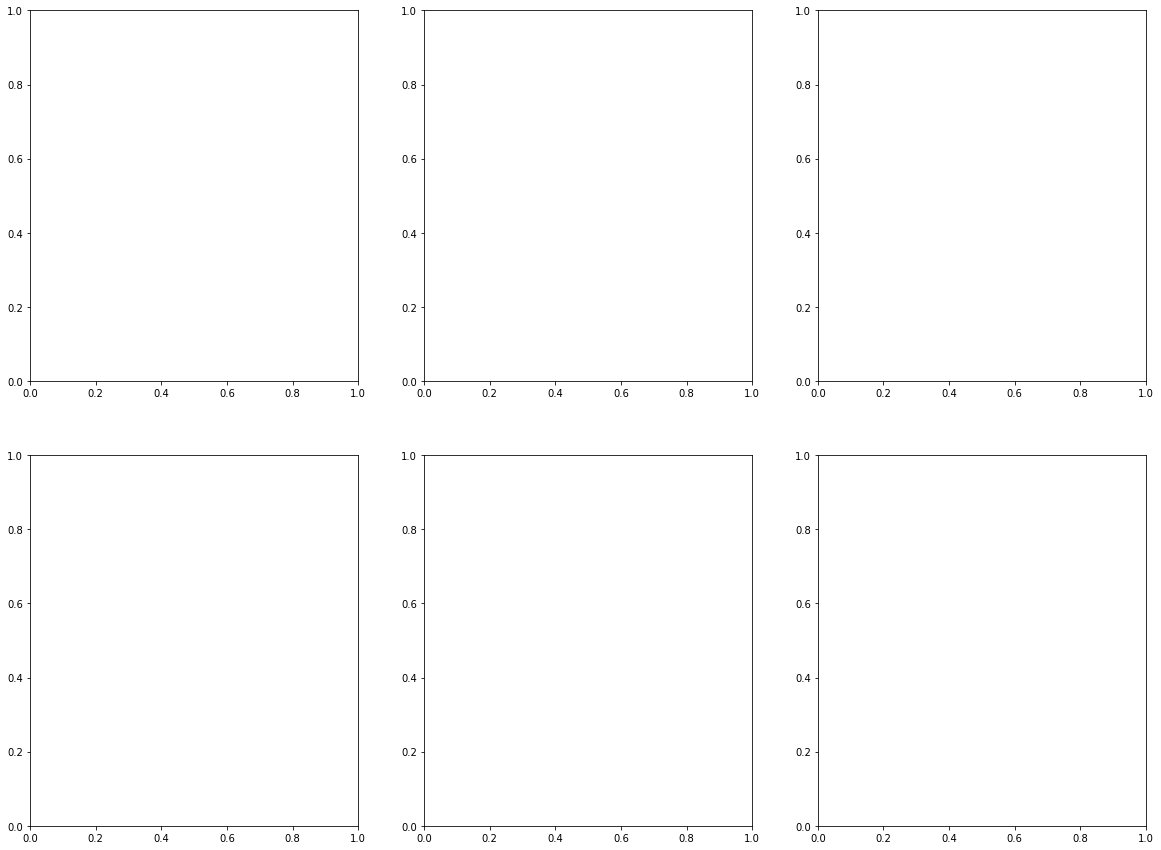

In [14]:


fig, axes = plt.subplots(2, 3, figsize=(20, 15))
title = "Learning Curves United States Models"

# plot_learning_curve(
#     model_hours_forest_lc, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )

In [15]:
model_hours_linear_lc_US = LinearRegression()
# plot_learning_curve(
#     model_hours_linear_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,0], n_jobs=2
# )
plot_learning_curve(
    model_hours_linear_lc_US, "Learning Curve US Linear Regression", training_data_US, training_labels_US, axes=axes[0,0], n_jobs=2
)

<module 'matplotlib.pyplot' from 'C:\\Users\\wills\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [16]:
model_hours_linear_lc_SCT = LinearRegression()
# plot_learning_curve(
#     model_hours_linear_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,0], n_jobs=2
# )
plot_learning_curve(
    model_hours_linear_lc_SCT, "Learning Curve Scotland Linear Regression", training_data_SCT, training_labels_SCT, axes=axes[1,0], n_jobs=2
)

<module 'matplotlib.pyplot' from 'C:\\Users\\wills\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
model_hours_forest_lc_US = RandomForestRegressor(n_estimators=100, n_jobs=2)
# plot_learning_curve(
#     model_hours_forest_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,1], n_jobs=2
# )
plot_learning_curve(
    model_hours_forest_lc_US, "Learning Curve US Random Forest Regression", training_data_US, training_labels_US, axes=axes[0,1], n_jobs=2
)

<module 'matplotlib.pyplot' from 'C:\\Users\\wills\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
model_hours_forest_lc_SCT = RandomForestRegressor(n_estimators=100, n_jobs=2)
# plot_learning_curve(
#     model_hours_forest_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,1], n_jobs=2
# )
plot_learning_curve(
    model_hours_forest_lc_SCT, "Learning Curve Scotland Random Forest Regression", training_data_SCT, training_labels_SCT, axes=axes[1,1], n_jobs=2
)

<module 'matplotlib.pyplot' from 'C:\\Users\\wills\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

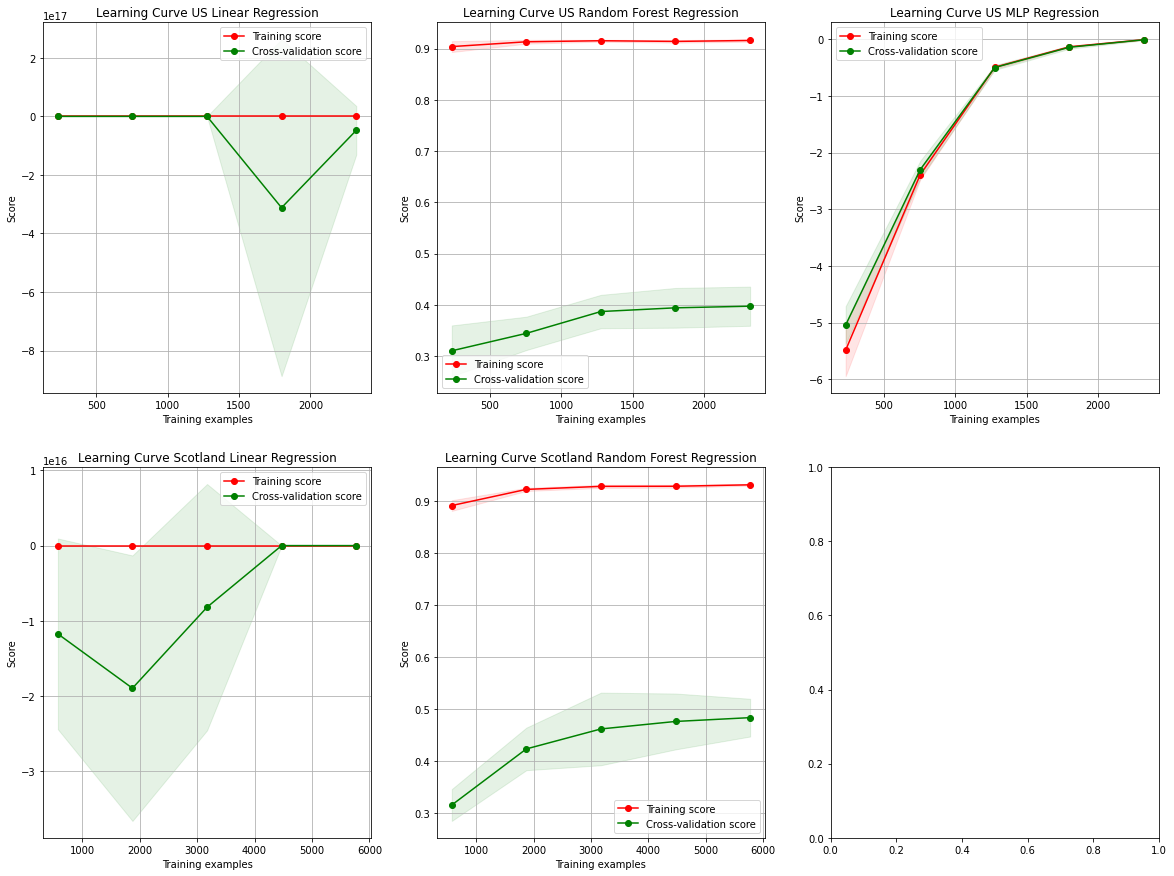

In [19]:
model_hours_MLP_lc_US = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100,),activation="tanh")
# plot_learning_curve(
#     model_hours_MLP_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,2], n_jobs=2
# )
plot_learning_curve(
    model_hours_MLP_lc_US, "Learning Curve US MLP Regression", training_data_US, training_labels_US, axes=axes[0,2], n_jobs=2
)
fig

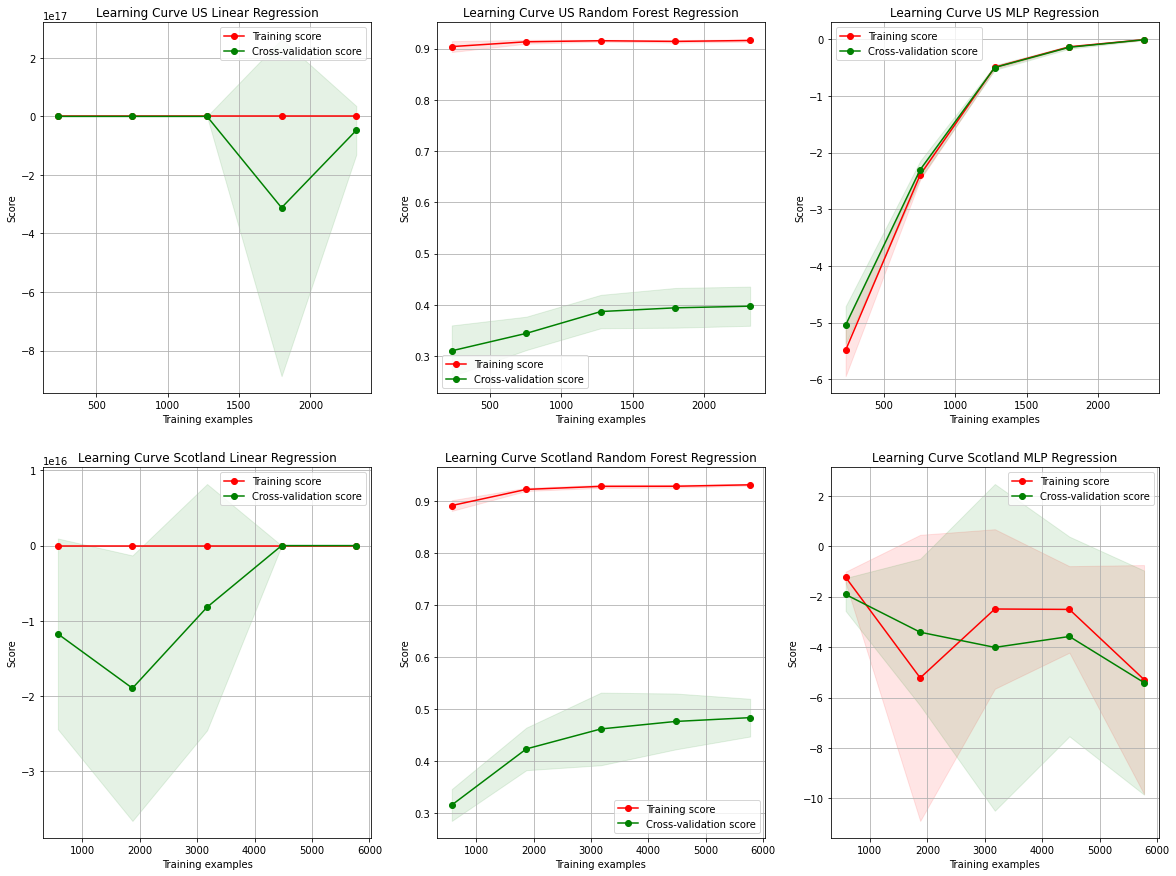

In [20]:
model_hours_MLP_lc_SCT = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100,),activation="tanh")
# plot_learning_curve(
#     model_hours_MLP_lc, title, training_data_US[index_US], training_labels_US[index_US], axes=axes[:,2], n_jobs=2
# )
plot_learning_curve(
    model_hours_MLP_lc_SCT, "Learning Curve Scotland MLP Regression", training_data_SCT, training_labels_SCT, axes=axes[1,2], n_jobs=2
)
fig

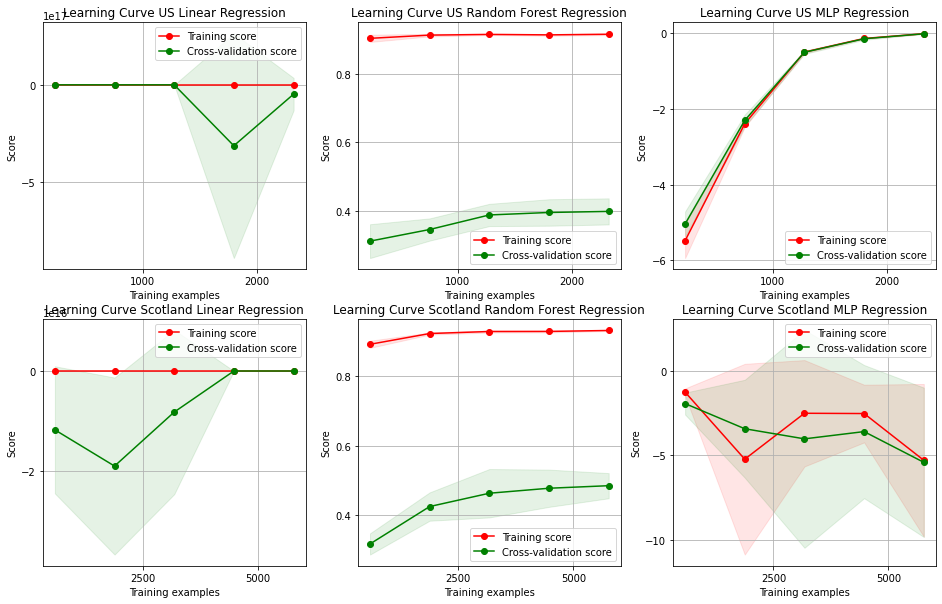

In [21]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rcParams.update({'font.size': 30})
fig.set_size_inches(16, 10)
fig